   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 33.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


NameError: name 'radar_data' is not defined

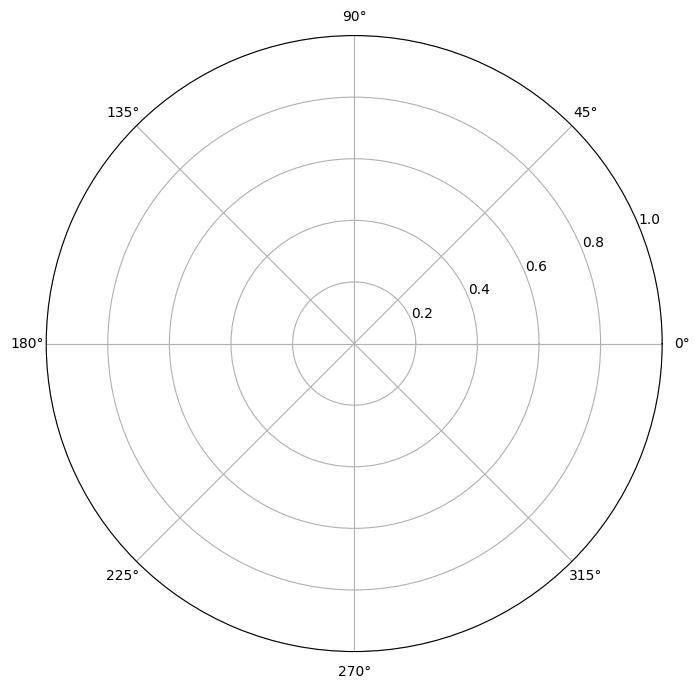

In [7]:
# Install missing packages
%pip install matplotlib seaborn

from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
from math import pi

# Generowanie PDF bez emoji – czysty, estetyczny layout
pdf_path_clean = "/mnt/data/efekty_substancji_bez_emoji.pdf"

with PdfPages(pdf_path_clean) as pdf:
    # Radar chart
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    for substance, values in radar_data.items():
        values_circular = values[:-1] + values[:1]
        ax.plot(angles, values_circular, label=substance, color=kolor_radar[substance], linewidth=2)
        ax.fill(angles, values_circular, alpha=0.2, color=kolor_radar[substance])
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids([a * 180/pi for a in angles[:-1]], labels_radar)
    ax.set_ylim(0, 10)
    plt.title("Radar efektów: Mefedron, MDMA, Metamfetamina", fontsize=14, fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    pdf.savefig()
    plt.close()

    # Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=0.5, square=True,
                annot_kws={"size": 10, "weight": "bold"}, linecolor='white')
    plt.title("Heatmapa efektów substancji (0–10)", fontsize=14, fontweight='bold')
    plt.xlabel("Substancja")
    plt.ylabel("Efekt")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Strona z czystym opisem
    plt.figure(figsize=(8.27, 11.69))
    plt.axis('off')
    clean_text = (
        "Porównanie efektów substancji psychoaktywnych:\n\n"
        "Mefedron (4-MMC): Najwyższe libido i euforia, wysoka empatia. Typowy wybór w środowiskach imprezowych i chemsex.\n"
        "MDMA: Idealny do głębokich emocjonalnych połączeń. Maksymalna empatia, umiarkowany zjazd.\n"
        "Metamfetamina: Najbardziej energetyczna i długodziałająca. Bardzo wysoka euforia i libido, ale ekstremalny zjazd.\n"
        "Amfetamina: Umiarkowane wszystkie efekty, stosunkowo stabilna.\n"
        "3-MMC: Balans między MDMA a stymulantami – silna euforia i libido, średni zjazd.\n"
        "NEP: Słabsza wersja stymulanta, niska empatia i libido.\n"
        "Kokaina: Silna euforia i energia, ale bardzo krótki czas działania i mocny zjazd.\n\n"
        "Skala efektów: 0 (brak) – 10 (maksimum)\n\n"
        "Efekty mogą zmieniać się wraz z czystością substancji, tolerancją i aktualną kondycją organizmu.\n"
        "Trendy rynkowe przesuwają się w stronę RC z powodu ograniczeń prawnych klasyków."
    )
    plt.text(0.01, 0.99, clean_text, va='top', ha='left', wrap=True, fontsize=11)
    pdf.savefig()
    plt.close()

pdf_path_clean
